In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression Single Variable

Linear regressoin can be usd in predicting home prices, weather, stock price.

## Basics

In [2]:
df = pd.read_csv("S:\\Coding\\Codebasics\\ML\\1_linear_reg\\homeprices.csv")
df
#Areas of home and their prices.

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)               #df[['area']] when do we use double bracket?

#Fitting data means TRAINING THE LINEAR REGRESSION MODEL using available data points.
#It will create linear equation y=m*x+C, where y is Price(ie dependent variable), x is area(ie independent variable)

LinearRegression()

In [4]:
reg.coef_
#ie m

array([135.78767123])

In [5]:
reg.intercept_
#ie C

180616.43835616432

In [6]:
reg.predict([[3300]])
#Predict the price of home of area 3300.

array([628715.75342466])

In [7]:
3300*135.78767123 + 180616.43835616432
#price=area*coeff+intercept

628715.7534151643

## Generating csv file with list of home price predictions

In [8]:
df1 = pd.read_csv('S://Coding//Codebasics//ML//1_linear_reg//areas.csv')
df1.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [9]:
p = reg.predict(df1)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [10]:
df1['price'] = p
df1

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [11]:
df1.to_csv("prediction.csv", index=False)
#To export file as csv

## Plotting prediction

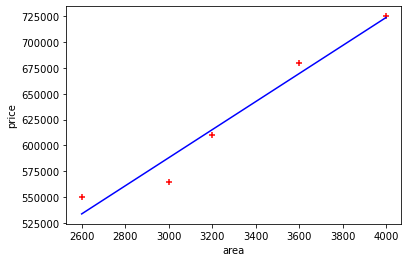

In [12]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

## Exercise

In [13]:
df2 = pd.read_csv('S:\\Coding\\Codebasics\\ML\\1_linear_reg\Exercise\\canada_per_capita_income.csv')
df2.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [16]:
model = linear_model.LinearRegression()
model.fit(df2[['year']],df2['per capita income (US$)'])

#LinearRegression is a class and model is an object of that class.

LinearRegression()

In [17]:
model.predict([[2020]])

array([41288.69409442])

# Linear Reg. with Multiple Independent Variables

Multiple regression: Multiple independent variables and one dependent variable
<p>Multivariate regression: 1 or more independent variables and multiple dependent variable 

## Handling NA values

In [19]:
df3 = pd.read_csv('S://Coding//Codebasics//ML//2_linear_reg_multivariate//homeprices.csv')
df3.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [20]:
df3.bedrooms.median()

4.0

In [22]:
#If answer would have been something like 3.5, 3.8 instead of 4, then use math.floor to get floor part of o/p:
import math
median_bedrooms = math.floor(df3.bedrooms.median())
median_bedrooms

4

In [23]:
df3.bedrooms = df3.bedrooms.fillna(median_bedrooms)
df3

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


## Multiple Regression

In [24]:
reg = linear_model.LinearRegression()
reg.fit(df3[['area', 'bedrooms', 'age']], df3.price)

LinearRegression()

In [25]:
reg.coef_
#since equation is y = m1*x1 + m2*x2 + m3*x3 + b

array([  112.06244194, 23388.88007794, -3231.71790863])

In [26]:
reg.intercept_

221323.00186540425

In [27]:
reg.predict([[3000,3,40]])

array([498408.25158031])

## Exercise

In [ ]:
from word2number import w2n

In [ ]:
df4 = pd.read_csv('S://Coding//Codebasics//ML//2_linear_reg_multivariate//Exercise//hiring.csv')
df4

In [ ]:
df5 = df4.fillna({
    'experience':'zero',
    'test_score(out of 10)': math.floor(df4['test_score(out of 10)'].mean())
})
df5

In [ ]:
df5.experience = df5.experience.apply(w2n.word_to_num)
df5
#Applying word2number.

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df5[['experience','test_score(out of 10)', 'interview_score(out of 10)']], df5['salary($)'])

In [ ]:
reg.predict([[12,10,10]])

# Gradient Descent

Cost functions: Mean squared error (most popular)</p>
 <p> MSE = (1/n)* sum(Y_actual - Y_predicted)^2  .  .  .  .  For i=1 to i=n and Y_predicted = mX+b</p>
                

**Following Gradient Descent fn is for regression**

In [3]:
def gradient_descent(x,y):
    n=len(x)                                                     #For value of n in partial derivative
    iteration = 200                                              #No. of iteration. It's just trial and error
    learning_rate=0.01                                           #Determines the step size at each iteration while moving toward global minima
    m_curr = b_curr = 0                                          #Value of m & b at starting point
    for i in range(iteration):
        y_predicted = m_curr*x+b_curr                            #For simplifying formulas of partial derivative of cost
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])  #cost fn is nothing but equation for Mean Squared Error(MSE)
        md = (-2/n) *sum(x*(y-y_predicted))                      #Partial derivative of MSE wrt m
        bd = (-2/n) *sum((y-y_predicted))                        #Partial derivative of MSE wrt b
        m_curr = m_curr - learning_rate*md                       #Adjusting m_curr. This is update rule
        b_curr = b_curr - learning_rate*bd                       #Adjusting b_curr. This is update rule
        print ( "m: {}, b: {}, iteration: {}, Cost: {}".format(m_curr, b_curr, i, cost ))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)
#With every next iteration, cost should tend towards zero. Bcz when cost will be zero m(slope) & b(intercept) will be most accurate.
#When to stop? : When cost value is closer to zero and it is not changing after further iterations.
#For bringing cost closer to zero, we use trial and error method for: iteration (eg:10,100,1000) and learning rate(eg:0.1, 0.001, 0.5, 0.005, 0.0001)

m: 0.62, b: 0.18, iteration: 0, Cost: 89.0
m: 1.0928, b: 0.3192, iteration: 1, Cost: 52.25039999999999
m: 1.453232, b: 0.42724799999999996, iteration: 2, Cost: 30.831949440000002
m: 1.7278860800000002, b: 0.5115091199999999, iteration: 3, Cost: 18.347751350784
m: 1.9370605952000002, b: 0.5776057727999999, iteration: 4, Cost: 11.070010749324897
m: 2.096250917888, b: 0.6298300216319999, iteration: 5, Cost: 6.826353152519786
m: 2.2172859146547204, b: 0.6714583661260799, iteration: 6, Cost: 4.350826141683065
m: 2.309195511463117, b: 0.7049920439242751, iteration: 7, Cost: 2.9056952040975976
m: 2.3788729763057748, b: 0.7323404723580026, iteration: 8, Cost: 2.0610450731046615
m: 2.431580493177024, b: 0.7549612843324961, iteration: 9, Cost: 1.5663423003130599
m: 2.471335107618129, b: 0.7739672290552247, iteration: 10, Cost: 1.2755882811903883
m: 2.501203350198827, b: 0.7902077780170325, iteration: 11, Cost: 1.1037021437989751
m: 2.523526146474063, b: 0.8043314214447622, iteration: 12, Cost: 1

## Feature Scaling & Mean Normalization

<p> We can speed up gradient descent by having each of our input values in roughly the same range.
    The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same.       Ideally: −1 ≤ x(i) ≤ 1.

**Feature scaling** involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1.

**Mean normalization** involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero.

To implement both of these techniques, adjust your input values as shown in this formula: **x =(x−μ)/s**
<p> Where μ is the average of all the values for feature and s is the range of values (max - min), or s is the           standard deviation.

# Save & load trained model using Jobib and Pickle

In [ ]:
df6 = pd.read_csv("S:\\Coding\\Codebasics\\ML\\1_linear_reg\\homeprices.csv")
df6.head()

In [ ]:
model = linear_model.LinearRegression()
model.fit(df[['area']],df6.price)

In [ ]:
model.predict([[3300]])

## pickle

Pickle model allows to serialize python object into a file.close

In [ ]:
import pickle

In [ ]:
with open ('model_pickle', 'wb') as file:                  #wb=  w:write mode, b:binary data
    pickle.dump(model,file)                                #dump means writing trained model in file

In [ ]:
with open ('model_pickle', 'rb') as file:                  #rb=  r:read mode,  b:binary data
    mp = pickle.load(file)                                #load means reading trained model from file

In [ ]:
mp.predict([[3300]])

## sklearn joblib

Joblib is more efficient on objects that carry large numpy arrays.

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model_joblib')

In [ ]:
mj = joblib.load('model_joblib')

In [ ]:
mj.predict([[3300]])

# Categorical, Dummy variables and One Hot Encoding

ML models don't understand text, they understand only numbers.

 **Categorical Variables are of 2 types:**</p>
 **1)Nominal:**Don't have any order between variables. Simple integer encoding doesn't work. Therefore we use One Hot Encoding.</p>
 **2)Ordinal:**Have some sort of order. Simple integer encoding works.</p>

## Using pandas get_dummies

In [ ]:
df7 = pd.read_csv('S:/Coding/Codebasics/ML/5_one_hot_encoding/homeprices.csv')
df7.head()

In [ ]:
dummies = pd.get_dummies(df7.town)
dummies

In [ ]:
merged = pd.concat([df7,dummies], axis='columns')
merged

For avoiding dummy variable trap: we should drop one of the dummy variable columns.
Google: dummy variable trap

In [ ]:
final = merged.drop(['town', 'west windsor'], axis='columns')
final

In [ ]:
x = final.drop(['price'], axis=1) #Since except 'price' all are independent variables. Price is dependent variable.
x

In [ ]:
y = final.price
y

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x, y)

In [ ]:
model1.predict([[2800,0,1]]) #price of 2800 in robinsville

In [ ]:
model1.predict([[3400,0,0]]) #price of 3400 in west windsor

In [ ]:
#To know how accurate our model is:
model1.score(x,y)                   #0.95 means 95% accuracy

In [ ]:
#This is how i used it in cleaning actual dataset
df99 = pd.get_dummies(data=df100, columns=['InternetService','Contract','PaymentMethod'])
df99.columns

In [1]:
#This how you do when data is binary (eg:Male/Female) and we want to encode it
column1 = pd.get_dummies(column1, drop_first=True) 

NameError: name 'pd' is not defined

## Using sklearn OneHotEncode

NEED TO LEARN IT FROM SOMEWHERE ELSE

First encode labels on town column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

fit_transform takes label column as i/p (ie town) and returns labels

In [ ]:
df7le = df7.copy()
df7le.town = le.fit_transform(df7le.town)
df7le

In [ ]:
x = df7le[['town','area']].values   #.values is used when we want x be 2D array, not a data frame
x

In [ ]:
y = df7le.price.values
y

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(categorical_features=[0]) #ie categorical features are present in 0th column

#This used to work in older version. below is the new version. please undestand it's working.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [ ]:
x = ct.fit_transform(x)
x

While using sklearn regression model: we don't need to drop any dummy variable column bcz it drops automatically. Here, we will still do it manually bcz it's a good practice to follow.

In [ ]:
x =x [:,1:]  #: means take all columns and 1: means take columns starting from 1st index in other words it means drop 0th column.
x

In [ ]:
model1.fit(x,y)

In [ ]:
model1.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

In [ ]:
model1.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

## Exercise

In [ ]:
df8 = pd.read_csv('S:/Coding/Codebasics/ML/5_one_hot_encoding/Exercise/carprices.csv')
df8.head()

In [ ]:
plt.xlabel('mileage')
plt.ylabel('price($)')
plt.scatter(df8['Mileage'],df8['Sell Price($)'])

In [ ]:
dummies1 = pd.get_dummies(df8['Car Model'])
dummies1

In [ ]:
merged1 = pd.concat([df8, dummies1], axis=1)
merged1

In [ ]:
final1 = merged1.drop(['Car Model', 'Audi A5'], axis=1)
final1

In [ ]:
x1 = final1.drop(['Sell Price($)'], axis=1)
x1

In [ ]:
y1 = final1['Sell Price($)']
y1

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x1,y1)

In [ ]:
model1.predict([[45000,4,0,1]])

In [ ]:
model1.score(x1,y1)

# Split dataset into Training data and Testing data

In [ ]:
df9 = pd.read_csv('S:/Coding/Codebasics/ML/6_train_test_split/carprices.csv')
df9.head()

In [ ]:
plt.scatter(df9['Mileage'],df9['Sell Price($)'])

In [ ]:
plt.scatter(df9['Age(yrs)'],df9['Sell Price($)'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [ ]:
x2 = df9[['Age(yrs)','Mileage']]
y2 = df9['Sell Price($)']

In [ ]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2)
#test size 0.2 means we want 20% of our data as test size
#train-test_split gives back 4 values as result: x2_train, x2_test, y2_train, y2_test

In [ ]:
x2_test
#x2_train
#y2_train
#y2_test

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x2_train , y2_train)       #No x2/y2, it's x2_train & y2_train

In [ ]:
clf.predict(x2_test)    #It is predicitng the o/p for the data which we didn't use in training and was kept away for testing.

In [ ]:
clf.score(x2_test,y2_test)

# Logistic Regression :Binary Classification

<p>Classificatoin is used to predict categorical values. Eg: Yes/No question(binary classification), choose 1 among others(multiclass classification).</p>
<p>Logistic regression is a technique that is used to solve classification problems.
We use sigmoid or Logit function.</p>

In [ ]:
df10 = pd.read_csv('S:/Coding/Codebasics/ML/7_logistic_reg/insurance_data.csv')
df10.head()

In [ ]:
plt.scatter(df10['age'], df10['bought_insurance'], color='red',marker='+')

In [ ]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(df10[['age']], df10.bought_insurance, test_size=0.1)

In [ ]:
x3_test
#x3_train
#y3_train
#y3_test

In [ ]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(x3_train,y3_train)

In [ ]:
model3.predict(x3_test)

In [ ]:
model3.score(x3_test,y3_test)

In [ ]:
model3.predict_proba(x3_test)   #It shows the probability of our data sample being in one class or the other.
#Check it's not working.

In [ ]:
model3.predict([[28]])

## Exercise

In [ ]:
df11 = pd.read_csv('S:/Coding/Codebasics/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
df11.head()

<p style="color:purple">Data exploration and visualization</p>

In [ ]:
df11_left = df11[df11.left==1]
df11_left.shape

In [ ]:
df11_retained = df11[df11.left==0]
df11_retained.shape

**Average numbers for all columns** 

In [ ]:
df11.groupby('left').mean()

From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

**Impact of salary on employee retention**

In [ ]:
pd.crosstab(df11['salary'], df11['left']).plot(kind='bar')
#Learn more about this code line

Above bar chart shows employees with high salaries are likely to not leave the company

<p style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</p>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [ ]:
subdf11 = df11[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf11.head()

**Tackle salary dummy variable**
<p> Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.</p>

In [ ]:
salary_dummies = pd.get_dummies(subdf11.salary, prefix="salary")

In [ ]:
subdf11_with_dummies = pd.concat([subdf11,salary_dummies],axis='columns')

In [ ]:
subdf11_with_dummies.head()

In [ ]:
subdf11_with_dummies.drop('salary',axis='columns',inplace=True)
subdf11_with_dummies.head()

In [ ]:
x4 = subdf11_with_dummies
x4.head()

In [ ]:
y4 = df11.left

In [ ]:
from sklearn.model_selection import train_test_split
x4_train,x4_test, y4_train, y4_test = train_test_split(x4,y4, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()
model4.fit(x4_train,y4_train)

In [ ]:
model4.predict(x4_test)

In [ ]:
model4.score(x4_test,y4_test)

# Logistic Regression : Multiclass classification

In [ ]:
from sklearn.datasets import load_digits
#sklearn.datasets has some predefined readymade data sets. we imported load_digits data set among them

In [ ]:
digits = load_digits() #Load_digits method to load our training set

In [ ]:
dir(digits)   #To know what our training set contains

In [ ]:
digits.data[0]   #printing our data at 0th location. digits.data is our data set.

In [ ]:
plt.gray()
plt.matshow(digits.images[0])     #To print image corresponding to given data. Upar wale data ki image hai ye.

In [ ]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [ ]:
digits.target[0:5] #It will tell us what is in image. Here images are 0,1,2,3,4 so is the o/p.

## Create and train logistic regression model

In [ ]:
from sklearn.model_selection import train_test_split
x5_train, x5_test, y5_train, y5_test = train_test_split(digits.data, digits.target, test_size=0.2)
#digits.data is i/p variable & digits.target is o/p variable and we divided them into test & training sets.
#random_state is used for reproducing your problem the same every time it is run. Eg:Refer 14.3
#If you do not use a random_state in train_test_split, every time you make the split you might get a different set of train and test data points

In [ ]:
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()
model5.fit(x5_train,y5_train)

In [ ]:
model5.score(x5_test,y5_test)

In [ ]:
model5.predict([digits.data[67]])

Now let's check in data set.

In [ ]:
digits.target[67]

Pretty close. Now let's check it's image.

In [ ]:
plt.matshow(digits.images[67])

In [ ]:
#Let's try 1 more time
model5.predict(digits.data[0:5])

##  Confusion Matrix

It helps us in understanding where our model is failing. Google it.

In [ ]:
y5_predicted = model5.predict(x5_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y5_test, y5_predicted)
cm
#Why it isn't working

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision Tree

<p> How to select ordering of features?
We should use that approach which gives High information at evey split. There should be less randomness.

Gini Impurity: It refers to impurity in dataset.</p>

In [ ]:
df12 = pd.read_csv('S:/Coding/Codebasics/ML/9_decision_tree/salaries.csv')
df12.head()

In [ ]:
inputs = df12.drop('salary_more_then_100k', axis='columns')
target = df12['salary_more_then_100k']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_company = LabelEncoder()     #Since we have 3 columns we need to create 3 objects of class
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
#Creating new columns in df
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs

In [ ]:
#Dropping old columns
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n.head()

In [ ]:
from sklearn import tree

In [ ]:
model6 = tree.DecisionTreeClassifier()

In [ ]:
model6.fit(inputs_n,target)

In [ ]:
model6.score(inputs_n,target)

In [ ]:
model6.predict([[2,2,1]])

## Exercise

In [ ]:
df13 = pd.read_csv('S:/Coding/Codebasics/ML/9_decision_tree/Exercise/titanic.csv')
df13.head()

In [ ]:
df14 = df13.drop(['PassengerId','Name','SibSp', 'Parch', 'Ticket','Cabin','Embarked'], axis='columns')
df14.head()

In [ ]:
para = df14.drop(['Survived'], axis='columns')
life = df14['Survived']

In [ ]:
para.Sex = para.Sex.map({'male': 1, 'female': 2})
#Since except Sex column, all columns have dtype: float64. We don't need encoders here.
#Har jagah encoder nhi ghusana hota hai.

In [ ]:
para.Age = para.Age.fillna(para.Age.mean())
#Always check data first and fillna

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(para,life,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model17 = DecisionTreeClassifier()

In [ ]:
model17.fit(X6_train,y6_train)

In [ ]:
model17.score(X6_test,y6_test)

# Support Vector Machine

**Didn't understnad whole SVM**

<p> SVM tries to maximize distance betweeen the data point and data dividing line/plane.</p>
<p> SVM draws a hyper plane in n dimensional space such that it maximizes margin between classification groups. </p>

<p>Gamma? :  </p>
<p>Regularization? : </p>

Kernel: we are creating a transformation on existing features so that we can draw decision boundary easily.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)                     #Dir is applied on classifier to see what properties that object(or classifier) has.

In [ ]:
iris.feature_names    #ie iris data set has these following columns.

In [ ]:
df15 = pd.DataFrame(iris.data, columns=iris.feature_names)      #creating DF
df15.head()

In [ ]:
df15['target'] = iris.target     #Adding a column
df15.head()

In [ ]:
iris.target_names   #ie o means setosa, 1 means versicolor, 2 means virginica

In [ ]:
#df15[df15.target==0] #O/p is 0 to 49, which means 0 to 49 are setosa
#df15[df15.target==1] #O/p is 50 to 99, which means 0 to 49 are versicolor
#df15[df15.target==2] #O/p is 100 to 149, which means 0 to 49 are virginica

df15[df15.target==0].head()

In [ ]:
df15['flower_name'] = df15.target.apply(lambda x: iris.target_names[x])
df15.head()
#Adding new column in DF using existing column by making use of apply fn. We also use lambda fn.

**visualizing using matplot:**

In [ ]:
#Creating 3 DFs for 3 species of flower.
df15A = df15[df15.target==0]
df15B = df15[df15.target==1]
df15C = df15[df15.target==2]

In [ ]:
df15A.head()

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df15A['sepal length (cm)'], df15A['sepal width (cm)'],color="green",marker='+')
plt.scatter(df15B['sepal length (cm)'], df15B['sepal width (cm)'],color="blue",marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df15A['petal length (cm)'], df15A['petal width (cm)'],color="green",marker='+')
plt.scatter(df15B['petal length (cm)'], df15B['petal width (cm)'],color="blue",marker='.')

**Train Using Support Vector Machine (SVM)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X7 = df15.drop(['target','flower_name'], axis='columns')
y7 = df15.target

In [ ]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model18 = SVC()   
#Here in () we can provide diff. values for parameters such as gamma, C(ie Regularization), Kernel etc.

In [ ]:
model18.fit(X7_train, y7_train)

In [ ]:
model18.score(X7_test, y7_test)

In [ ]:
model18.predict([[4.8,3.0,1.5,0.3]])

## Exercise

# Random Forest

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [ ]:
df16 = pd.DataFrame(digits.data)
df16.head()

In [ ]:
df16['target'] = digits.target
df16.head()

In [ ]:
from sklearn.model_selection import train_test_split
X8_train, X8_test, y8_train, y8_test = train_test_split(df16.drop(['target'], axis='columns'), digits.target, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model19 = RandomForestClassifier(n_estimators=40)              #we provided n_estimators. Incresing or Decreasing it, will change the score of the model. It is the number of trees we want to build.
model19.fit(X8_train,y8_train)

In [ ]:
model19.score(X8_test,y8_test)

In [ ]:
y8_predicted = model19.predict(X8_test)

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y8_test, y8_predicted)
cm

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Exercise

# K Fold cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [ ]:
from sklearn.model_selection import train_test_split
X9_train, X9_test, y9_train, y9_test = train_test_split(digits.data, digits.target, test_size = 0.2)

**Now we will use different classifiers:** Classifier is a ML model which classifies samples.

In [ ]:
#1st classifier: LogisticRegression.
lr = LogisticRegression()
lr.fit(X9_train, y9_train)
lr.score(X9_test, y9_test)

In [ ]:
#2nd classifier: SVM
svm = SVC()
svm.fit(X9_train, y9_train)
svm.score(X9_test, y9_test)

In [ ]:
#3rd classifier: Random Forest
rf = RandomForestClassifier()
rf.fit(X9_train, y9_train)
rf.score(X9_test, y9_test)

## KFold cross validation

We do this to compare scores of diff classifiers and we choose that classifier which out performs others.

**Basic Example**

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

**Use KFold for our digits example**

In [ ]:
def get_score(model, X9_train, X9_test, y9_train, y9_test):
    model.fit(X9_train, y9_train)
    return model.score(X9_test, y9_test)

In [ ]:
#Don't worry, we don't use this method. It's just for learning. We use method mentioned in 12.2

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X9_train, X9_test, y9_train, y9_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X9_train, X9_test, y9_train, y9_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X9_train, X9_test, y9_train, y9_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X9_train, X9_test, y9_train, y9_test))

In [ ]:
scores_logistic
#ie it split data 3 times(ie choose diff set of values for x_train, aka 3 folds) for logitic regression and calculated it's score for each set.

In [ ]:
scores_svm
#it split data 3 times(ie choose diff set of values for x_train, aka 3 folds) for svm and calculated it's score for each set.

In [ ]:
scores_rf
#ie it split data 3 times(ie choose diff set of values for x_train, aka 3 folds) for RF and calculated it's score for each set.

## cross_val_score function

cross_val_score uses stratifield kfold by default

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#cross_val_score(LogisticRegression(), digits.data, digits.target) : simplest version.
lr1 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
lr1

In [ ]:
np.average(lr1)
#Here again data was split into 3 folds and we took average of those 3 folds.

In [ ]:
svm1 = cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)   #(Noramlly we use, cv=10)
svm1

In [ ]:
np.average(svm1)

In [ ]:
rf1 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)
rf1

In [ ]:
np.average(rf1)

Since the average score of RF is highest. we will choose RandomForest classifier for our model.

## Parameter tunning using k fold cross validation

Here we will use any one algorithm but we will keep changing it's parameters.

In [ ]:
#cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target) : Simplest form.
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

In [ ]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

In [ ]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

In [ ]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

## Exercise

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lr2 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), iris.data, iris.target,cv=3)
lr2

In [ ]:
np.average(lr2)

In [ ]:
svm2 = cross_val_score(SVC(gamma='auto'), iris.data, iris.target,cv=10)   #(Noramlly we use, cv=10)
svm2

In [ ]:
np.average(svm2)

In [ ]:
rf2 = cross_val_score(RandomForestClassifier(n_estimators=40),iris.data, iris.target,cv=10)
rf2

In [ ]:
np.average(rf2)

In [ ]:
dt = cross_val_score(DecisionTreeClassifier(), iris.data, iris.target, cv=10)
dt

In [ ]:
np.average(dt)

**Best score so far is from SVM: 0.98**

# K Means Clustering

**Unsupervised learning**

**Elbow method:** To determine correct no. of clusters ie K

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df17 =pd.read_csv('S:/Coding/Codebasics/ML/13_kmeans/income.csv')
df17.head()

In [ ]:
plt.scatter(df17['Age'],df17['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
km = KMeans(n_clusters=3)
km

In [ ]:
y10_predicted = km.fit_predict(df17[['Age','Income($)']])
y10_predicted
#Our data got clustered.

In [ ]:
df17['cluster'] = y10_predicted
df17.head()
#we appended/added our data into our DF

In [ ]:
km.cluster_centers_
#Finding centres of the clusters

In [ ]:
#Creating 3 DFs from 3 diff clusters.
df17A = df17[df17.cluster==0]
df17B = df17[df17.cluster==1]
df17C = df17[df17.cluster==2]

#Plotting each DF
plt.scatter(df17A.Age,df17A['Income($)'],color='green')
plt.scatter(df17B.Age,df17B['Income($)'],color='red')
plt.scatter(df17C.Age,df17C['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#X coordinates of clusters are "km.cluster_centers_[:,0]", 0 denotes 0th column of cluster_centers_ matrix and Y coordinates of clusters are "km.cluster_centers_[:,1]", 1 denotes 1st column of cluster_centers_ matrix
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

The mismatch between red & black is bcz of X,Y scale(they don't start from zero). To fix this mismatch, we use min max scaler.

## Preprocessing using min max scaler

In [ ]:
scaler = MinMaxScaler()

#Scaling income
scaler.fit(df17[['Income($)']])
df17['Income($)'] = scaler.transform(df17[['Income($)']])

#scaling age
scaler.fit(df17[['Age']])
df17['Age']= scaler.transform(df17[['Age']])

df17.head()

In [ ]:
plt.scatter(df17.Age,df17['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y10_predicted = km.fit_predict(df17[['Age', 'Income($)']])
y10_predicted

In [ ]:
df17['cluster']=y10_predicted
df17.head()

In [ ]:
#Creating 3 DFs from 3 diff clusters.
df17A = df17[df17.cluster==0]
df17B = df17[df17.cluster==1]
df17C = df17[df17.cluster==2]

#Plotting each DF
plt.scatter(df17A.Age,df17A['Income($)'],color='green')
plt.scatter(df17B.Age,df17B['Income($)'],color='red')
plt.scatter(df17C.Age,df17C['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

## Elbow Plot

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df17[['Age','Income($)']])
    sse.append(km.inertia_)

In [ ]:
sse

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Exercise

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
df18 = pd.DataFrame(iris.data, columns=iris.feature_names)
df18.head()

In [ ]:
df19 = df18.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns')
df19.head()

In [ ]:
plt.scatter(df19['petal length (cm)'],df19['petal width (cm)'], marker='+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [ ]:
km = KMeans(n_clusters=3)
km

In [ ]:
y11_predicted = km.fit_predict(df19[['petal length (cm)','petal width (cm)']])
y11_predicted

In [ ]:
df19['cluster'] = y11_predicted
df19.head()

In [ ]:
km.cluster_centers_

In [ ]:
df19A = df19[df19.cluster==0]
df19B = df19[df19.cluster==1]
df19C = df19[df19.cluster==2]

plt.scatter(df19A['petal length (cm)'],df19A['petal width (cm)'],color='green')
plt.scatter(df19B['petal length (cm)'],df19B['petal width (cm)'],color='red')
plt.scatter(df19C['petal length (cm)'],df19C['petal width (cm)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

**Elbow map**

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df19)
    sse.append(km.inertia_)

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Naive Bayes

**Naive Bayes has 3 types of classifiers:**</p>
**1)Bernoulli N.B.:**</p> It assumes all features(not the target variable) are binary(0/1). 1s can present 'True/Yes/occurance' and 0s as 'False/No/Doesn't occur'.

**2)Multinomial N.B.:**</p>It is used for discrete data. Eg: Movie ratings ranging from 1 to 5, each rating will have certain frequency to present.

**3)Gaussian N.B.:**</p> It is used in cases when all features are continuous ie we have normal distribution or bell curve in our features.

## Titanic survival prediction

In [ ]:
df20 = pd.read_csv('S:/Coding/Codebasics/ML/14_naive_bayes/titanic.csv')
df20.head()

In [ ]:
df20.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df20.head()

In [ ]:
inputs = df20.drop('Survived',axis='columns')
target = df20.Survived

In [ ]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

In [ ]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

In [ ]:
inputs.drop(['Sex'],axis='columns',inplace=True)
inputs.head(3)

In [ ]:
#For checking if there are any NA values:
inputs.columns[inputs.isna().any()]

In [ ]:
#Filling NA values:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

In [ ]:
from sklearn.model_selection import train_test_split
X10_train, X10_test, y10_train, y10_test = train_test_split(inputs,target,test_size=0.3)

### Naive Bayes model

In [ ]:
#GaussianNB is used when data distribution is normal distribution/Gaussian distribution.
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X10_train,y10_train)

In [ ]:
model.score(X10_test,y10_test)

In [ ]:
X10_test[0:10]

In [ ]:
y10_test[0:10]

In [ ]:
model.predict(X10_test[0:10])

In [ ]:
model.predict_proba(X10_test[:10])

**Calculate the score using cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X10_train, y10_train, cv=5)

## Email spam filter

In [ ]:
df21 = pd.read_csv('S:/Coding/Codebasics/ML/14_naive_bayes/spam.csv')
df21.head()

In [ ]:
df21.groupby('Category').describe()

In [ ]:
#Encoding 'Category' using lambda function.
df21['spam']=df21['Category'].apply(lambda x: 1 if x=='spam' else 0)
df21.head()

In [ ]:
from sklearn.model_selection import train_test_split
X11_train, X11_test, y11_train, y11_test = train_test_split(df21.Message,df21.spam, test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X11_train_count = v.fit_transform(X11_train.values)    #X11_train_count is the number matrix which we got by converting unique words from emails.
X11_train_count.toarray()[:2]
#We are creating a matrix out of labels, which are marked against the unique words from emails.
#Let's say we have only 3 unique words in emails and those are Free, Win, Discount. we will lable Free as 0, Win as 1, Discount as 2 and now we will creat a matrix out of 0,1,2 according to appearance of those 3 words in emails

In [ ]:
#Since each unique word have certain frequency, we will use Multinomial NB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X11_train_count,y11_train)

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

In [ ]:
X11_test_count = v.transform(X11_test)
model.score(X11_test_count, y11_test)

### Sklearn Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X11_train, y11_train)

In [ ]:
clf.score(X11_test,y11_test)

In [ ]:
clf.predict(emails)

## Exercise

Just copied and pasted

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
dir(wine)      #Dir is applied on classifier to see what properties that object(or classifier) has.

In [ ]:
wine.feature_names

In [ ]:
wine.target_names

In [ ]:
df22 = pd.DataFrame(wine.data,columns=wine.feature_names )
df22.head()

In [ ]:
df22['target'] = wine.target
df22.head()

In [ ]:
from sklearn.model_selection import train_test_split
X12_train, X12_test, y12_train, y12_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=100)
# If we do not use a random_state in train_test_split, every time we make the split we might get a different set of train and test data points

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model = GaussianNB()
model.fit(X12_train,y12_train)

In [ ]:
model.score(X12_test,y12_test)

In [ ]:
mn = MultinomialNB()
mn.fit(X12_train,y12_train)
mn.score(X12_test,y12_test)

# Hyper parameter tunning using GridSearchCV

Just copied and posted whole 15

The process of choosing optimal parameter is called hyper tuning.

**For iris flower dataset in sklearn library, we are going to find out best model and best hyper parameters using GridSearchCV**

In [ ]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [ ]:
df23 = pd.DataFrame(iris.data,columns=iris.feature_names)
df23['flower'] = iris.target
df23['flower'] = df23['flower'].apply(lambda x: iris.target_names[x])
df23[47:150]

## Approach 1: Use train_test_split and manually tune parameters by trial and error

In [ ]:
from sklearn.model_selection import train_test_split
X13_train, X13_test, y13_train, y13_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [ ]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X13_train,y13_train)
model.score(X13_test, y13_test)

## Approach 2: Use K Fold Cross validation

**Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

**Above approach is tiresome and very manual. We can use for loop as an alternative**

In [ ]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

**From above results we can say that rbf with C=1 or 10 or linear with C=1 will give best performance**

## Approach 3: Use GridSearchCV

**GridSearchCV does exactly same thing as for loop above but in a single line of code**

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_
#parameters are supplied in {} (ie parameter grid).

In [ ]:
#Changing above o/p into a DF
df24 = pd.DataFrame(clf.cv_results_)
df24

In [ ]:
df24[['param_C','param_kernel','mean_test_score']]

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

**Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2                       #We will try only 2 combinations.
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

## Different models with different hyperparameters:

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


In [ ]:
df25 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df25

**Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification**

## Exercise

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df26 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df26

# L1 & L2 Regularization